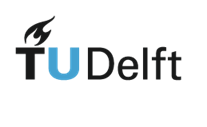

<div style="text-align: center"> Section of Railway Engineering <br>
Department of Engineering Structures <br>
Faculty of Civil Engineering and Geosciences <br>
Delft University of Technology </div>


<div style="text-align: center">CS4305TU Applied Machine Learning <br>
    Assignment 1: <b>Clustering</b></div>


<div style="text-align: center"><b>Deadline</b>: 5/9/20</div>

***

Assignment 1 solutions: Pratik Rindhe (5253268)

### Question 1

Consider the problem of field monitoring of a railway line. We make use of on-board measurements to find the set of important locations to be visited during the next field monitoring campaign. In this assignment, you will help to decide which critical locations should be visited by a given number of teams of railway technicians. In this exercise, we assume the selected locations are all equally important and should be monitored during the next working day. In Figure 1, you can see as an example, a railway line (red line) and marked as “+” some possible important locations. We consider using clustering to solve this problem. A cluster will be a group of important locations. Each cluster will be assigned to only one team of technicians.

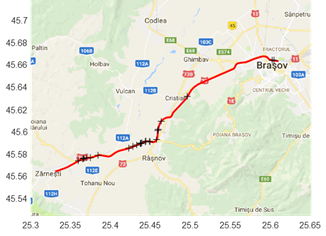
Figure 1: Detection of interesting locations for monitoring, in the railway line between Braşov to Zărneşti in Romania. The railway line is in red, in black the interesting locations.[1]

**Question 1.1**: Think openly about practical issues of this problem. Indicate three essential aspects or variables that will influence/limit the assignments of clusters to the different teams. 

- Calculation of distances (due to the non-linear natue of the railway track)
- How many number of clusters should be formed? (Accuracuy will depend on the number of clusters)
- Determination of the centroid location is difficult
- Outliers can create some issues

For the next questions (1.2 and 1.3), we consider a single railway line (as in Figure 1), of about 25 kilometers long. GPS data of critical locations are mapped into a railway track kilometer position. The data you receive consists of “N” values between 0 and 25, representing “N” important locations. We will make use of the most simple K-means algorithm. We assume an initialization of the centroids. Then, two steps are considered per iteration: 

1) assign points to the nearest centroid, <br>
2) update centroids according to the points assigned to them. 

The algorithm converges if the solution is the same as in the previous iteration. Assume the important locations are the following:

[2.9, 3.0, 3.1, 23.5, 23.6, 23.7]


**Question 1.2**: If the initialization of the centroids is at locations 3.0 and 23.6, how many iterations will the algorithm need to converge? 

- The algorithm needed only 1 iteration to converge (2 iterations if the validation of convergence is taken into account)

**Question 1.3**: If the initialization of the centroids is at two different random points x and y, x<y, with values between 0 and 25, how many iterations will the algorithm need to converge? Hint: the iterations will depend on the values you analyze for x and y. 

- For x = 1, y = 2
-- The algorithm needs 3 iterations for convergence.

- For x = 24, y = 25
-- The algorithm needs 3 iterations for convergence.

- All the other cases needs 2 iterations for convergence.

- ** please note that the results are written by considering that the algorithm requires an additional iteration step to validate the convergence

**Question 1.4**: In this question, we consider a part of the Dutch railway network. The interesting locations for monitoring are given in 2D coordinates and are fictive. Consider the dataset of a possible scenario in the file `NLLocations.csv`. Obtain an estimated knee point when evaluating within-cluster sums of point-to-centroid distances as a function of the number of clusters.

- The knee lies approximately at number of clusters = 6 (refer the figure below)

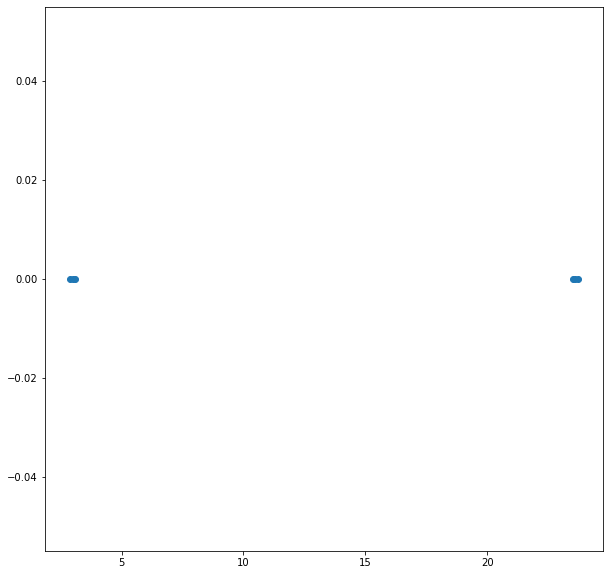

1


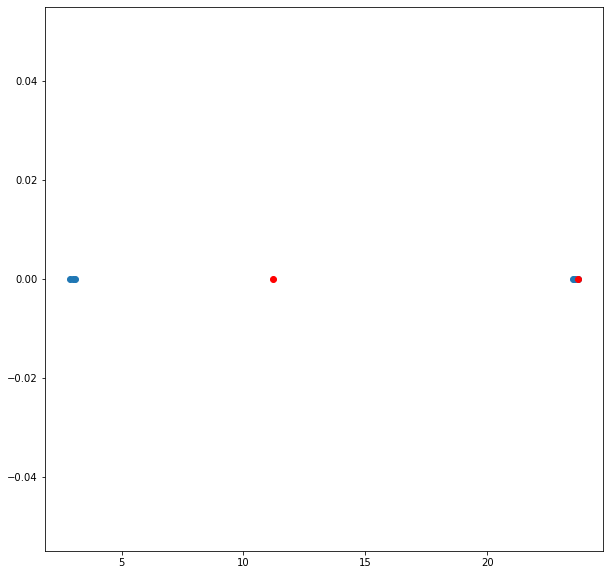

2


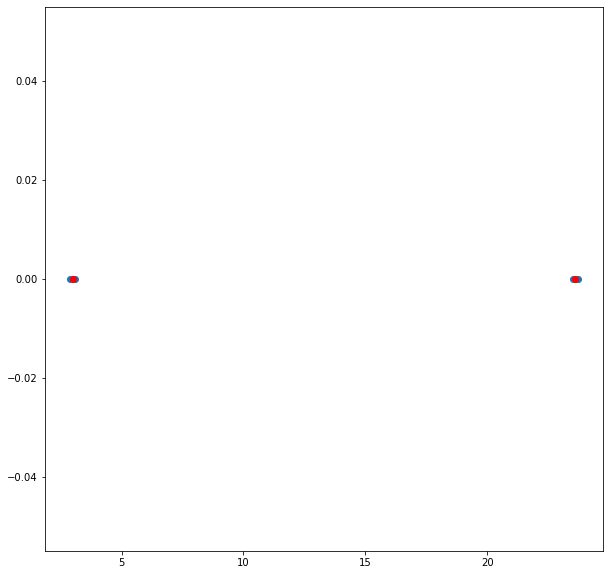

3


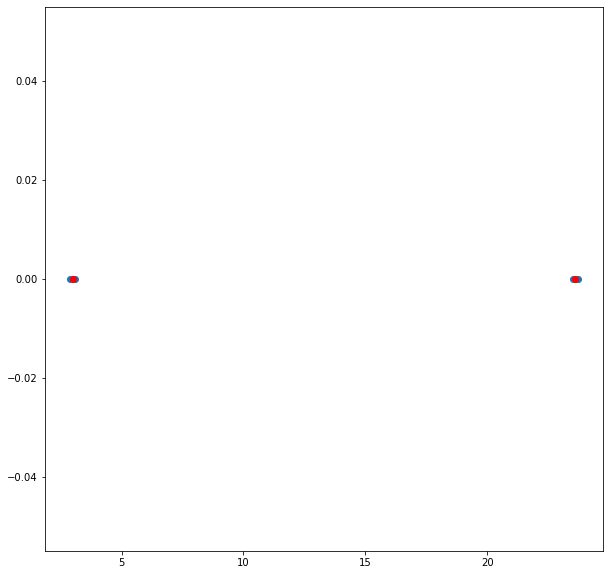

In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

### Question 1.2 and 1.3
## kilometer positions
X = np.array([2.9, 3.0, 3.1, 23.5, 23.6, 23.7])

## visualising the GPS positions
plt.figure(figsize=(10, 10))
plt.scatter(X, np.zeros(np.shape(X)))
plt.show()

X = X.reshape(-1, 1)

## Defining the intial centroid points
initial = np.array([1, 2]).reshape(-1, 1)


## applying k-means algorithm

err = 1
centroid_old = 0
i = 0
while (abs(err) > 0):
    kmeans = KMeans(n_clusters=2, init = initial, n_init=1, max_iter=i+1).fit(X)
    y_kmeans = kmeans.fit_predict(X)
    ## printing the outcomes
    #print(kmeans.labels_)

    print(kmeans.n_iter_)

    #print(kmeans.cluster_centers_)

    #print(kmeans.inertia_)

    ## visualising the results
    plt.figure(figsize=(10, 10))
    plt.scatter(X, np.zeros(np.shape(X)))
    plt.scatter(kmeans.cluster_centers_, np.zeros(np.shape(kmeans.cluster_centers_)), c = 'red')
    plt.show()
    centroid = kmeans.cluster_centers_
    err = np.sum(centroid - centroid_old) 
    centroid_old = centroid
    i = i+1

    


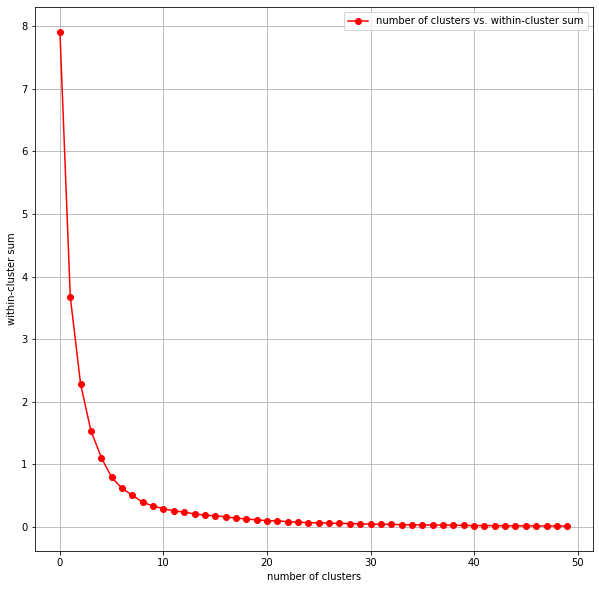

6


In [3]:
### Question 1.4

data = pd.read_csv("NLLocations.csv")
data.head()

X = data.to_numpy()
X = X.reshape([-1,2])

i = 0
i_last = 50
clust_sum = np.zeros((i_last,1))
while i < i_last:
    kmeans = KMeans(n_clusters=i+1, n_init=10, max_iter=300).fit(X)
    y_kmeans = kmeans.fit_predict(X)
    ## printing the outcomes
    #print(kmeans.labels_)

    #print(kmeans.n_iter_)

    #print(kmeans.cluster_centers_)

    #print(kmeans.inertia_)
    centroid = kmeans.cluster_centers_
    ## visualising the results
    '''
    plt.figure(figsize=(10, 10))
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(centroid[:,0], centroid[:,1], c = 'black')
    plt.show()
    '''
    clust_sum[i,0] = kmeans.inertia_
    i = i+1

    
plt.figure(figsize=(10, 10))
plt.plot(np.arange(i_last), clust_sum, color='red', marker = 'o',  label='number of clusters vs. within-cluster sum')
plt.xlabel(r'number of clusters'); plt.ylabel(r'within-cluster sum')
plt.legend(loc='best')
plt.grid()
plt.show()

from kneed import KneeLocator, DataGenerator
x = (np.arange(i_last)).reshape([-1,])
y = clust_sum.reshape([-1,])
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print(kn.knee)

In [4]:
np.shape(y)

(50,)

- The knee lies at number of clusters = 6

### Question 2

Consider the problem of rail surface defect detection. This problem can be considered as an anomaly detection problem, in the sense that in well-maintained railway infrastructures, most data you collect will belong to the healthy rail surface condition. In Figure 2, you can see examples of one type of those defects called squat. Although some small defects might disappear due to natural wear, others will dynamically change their condition from light to moderate to severe.


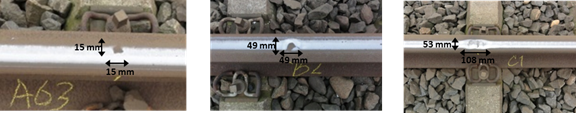
Figure 2: Representative squat defects. (a) Light squat. (b) Moderate squat. (c) Severe squat.[2]

We make use of an on-board measurement system to obtain two features per location related to the frequency content of the measurement signals. In total 84 locations are analyzed, consisting of both normal and defective rails. We will use the data from the file `RailDefects_Features.csv` to answer questions 2.1 and 2.2. We do not know which samples are normal and which ones are defects. Thus, we consider unsupervised clustering to gain insights into the obtained data. 

**Question 2.1**: Using K-means, with Euclidean distance, evaluate the within-cluster sums of point-to-centroid distances as a function of the number of clusters. Indicate a knee point for this data set. 

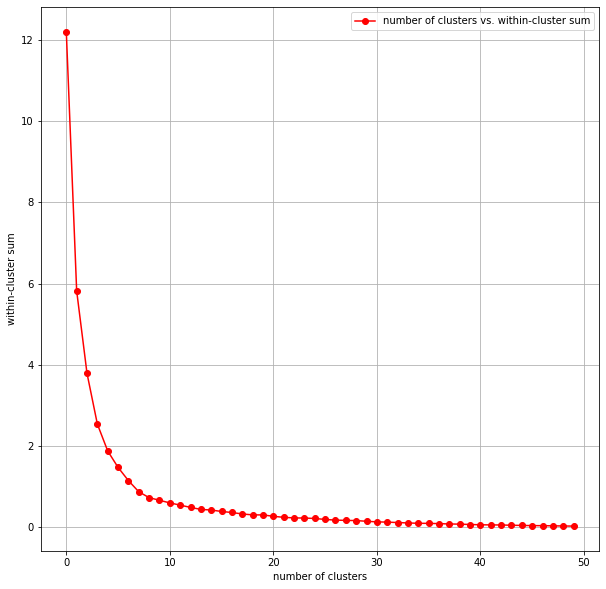

7


In [5]:
### Question 1.4

data = pd.read_csv("RailDefects_Features.csv")
data.head()

X = data.to_numpy()
X = X.reshape([-1,2])

i = 0
i_last = 50
clust_sum = np.zeros((i_last,1))
while i < i_last:
    kmeans = KMeans(n_clusters=i+1, n_init=10, max_iter=300).fit(X)
    y_kmeans = kmeans.fit_predict(X)
    ## printing the outcomes
    #print(kmeans.labels_)

    #print(kmeans.n_iter_)

    #print(kmeans.cluster_centers_)

    #print(kmeans.inertia_)
    centroid = kmeans.cluster_centers_
    ## visualising the results
    '''
    plt.figure(figsize=(10, 10))
    plt.scatter(X[:,0], X[:,1])
    plt.scatter(centroid[:,0], centroid[:,1], c = 'black')
    plt.show()
    '''
    clust_sum[i,0] = kmeans.inertia_
    i = i+1

    
plt.figure(figsize=(10, 10))
plt.plot(np.arange(i_last), clust_sum, color='red', marker = 'o',  label='number of clusters vs. within-cluster sum')
plt.xlabel(r'number of clusters'); plt.ylabel(r'within-cluster sum')
plt.legend(loc='best')
plt.grid()
plt.show()

from kneed import KneeLocator, DataGenerator
x = (np.arange(i_last)).reshape([-1,])
y = clust_sum.reshape([-1,])
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print(kn.knee)

- The knee lies at number of clusters = 7

**Question 2.2**: Obtain the dendrogram using hierarchical clustering (with single linkage). Indicate the number of clusters that are obtained when the threshold level is “0.13”. Indicate the number of data points in those clusters. Then, provide insights into how to select a proper threshold using the dendrogram. Provide the threshold that your method would recommend. 

In [47]:
from sklearn.cluster import AgglomerativeClustering


clustering = AgglomerativeClustering( linkage='single', distance_threshold=0.12, n_clusters=None).fit(X)
n_clusters = clustering.n_clusters_
print(n_clusters)
labels = clustering.labels_
i = 0
while i < n_clusters:
    print('Number of data points with label '+ str(i) + ' are : ' + str(np.size(labels[labels == i])))
    i = i+1

8
Number of data points with label 0 are : 51
Number of data points with label 1 are : 4
Number of data points with label 2 are : 1
Number of data points with label 3 are : 1
Number of data points with label 4 are : 24
Number of data points with label 5 are : 1
Number of data points with label 6 are : 1
Number of data points with label 7 are : 1


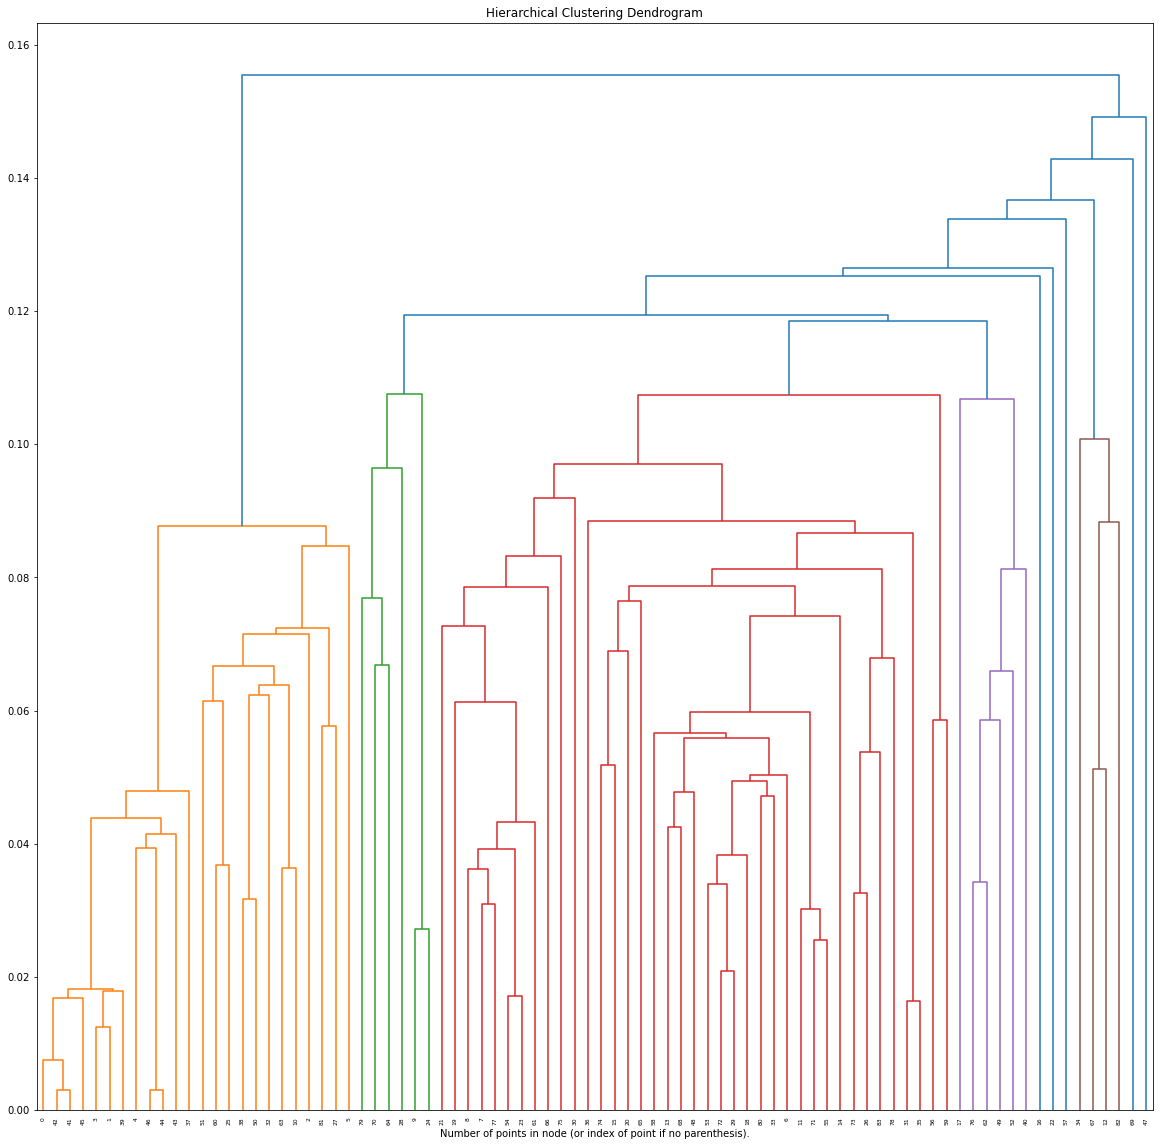

In [48]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(20, 20))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(clustering, truncate_mode='level')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

- It can be observed that, number of clusters depend on the set value of the threshold. Threshold above 0.1554 gives a single cluster. Hence, the threshold value has a higher limitation of 0.1554. Moreover, lowering the threshold increases the number of clusters. Threshold of 0.12 gives 8 clusters with five of them having only a single element. 

- To select optimal number of clusters, the height of the vertical lines in the dendrogram helps. It can be seen in the image that, a thresold value around 0.14 seems to be good for creating optimal number clusters (4 clusters) where the maximum variation in the vertical lines in the dendrogram can be observed. 

After your clustering analysis, the locations were verified by additional measurements and inspection. A list indicating normal and defective samples was made available: 0 for no visible defect and 1 for visible defect. The list required to answer questions 2.3 and 2.4 is in `RailDefects_Validation.csv`.

**Question 2.3**: Assume that 4 clusters were chosen for k-means, and that the threshold level proposed to find the number of clusters with hierarchical clustering is 0.14. Evaluate how many clusters have only normal samples, only defective samples, and clusters with both normal and defective samples

In [54]:
# with k-means

data = pd.read_csv("RailDefects_Features.csv")
defective = pd.read_csv("RailDefects_Validation.csv")
data.head()

defective_array = defective.to_numpy()
#print(defective_array)

X = data.to_numpy()
X = X.reshape([-1,2])

kmeans = KMeans(n_clusters=4, n_init=10, max_iter=300).fit(X)
label_kmeans = kmeans.labels_
#print(label_kmeans)
i = 0
while i < 4:
    if np.mean(defective_array[label_kmeans == i]) == 0:
        print('For k-means, Number '+ str(i+1)+' cluster has only normal samples')
    elif np.mean(defective_array[label_kmeans == i]) == 1:
        print('For k-means, Number '+ str(i+1)+' cluster has only defective samples')
    else:
        print('For k-means, Number '+ str(i+1)+' cluster has mixed samples')
    i = i+1
    
clustering = AgglomerativeClustering( linkage='single', distance_threshold=0.14, n_clusters=None).fit(X)
label_clustering = clustering.labels_
#print(label_clustering)
i = 0
while i < 4:
    if np.mean(defective_array[label_clustering == i]) == 0:
        print('For hierarchical clustering, Number '+ str(i+1)+' cluster has only normal samples')
    elif np.mean(defective_array[label_clustering == i]) == 1:
        print('For hierarchical clustering, Number '+ str(i+1)+' cluster has only defective samples')
    else:
        print('For hierarchical clustering, Number '+ str(i+1)+' cluster has mixed samples')
    i = i+1



For k-means, Number 1 cluster has mixed samples
For k-means, Number 2 cluster has mixed samples
For k-means, Number 3 cluster has only defective samples
For k-means, Number 4 cluster has only defective samples
For hierarchical clustering, Number 1 cluster has mixed samples
For hierarchical clustering, Number 2 cluster has mixed samples
For hierarchical clustering, Number 3 cluster has only defective samples
For hierarchical clustering, Number 4 cluster has only defective samples


**Question 2.4**: Using k-means or hierarchical clustering, is it possible to fully separate this data into clusters with only normal and only defective samples? Is this always possible?

- Since the clusters are based on the distance between the samples, it is not possible to seperate them into only normal and only defective sample unless very high number of clusters are taken. 

***
Below you can find some useful code snippets as well as links to the documentation of the methods that you will need to use in this assignment

Reading data:

In [ ]:
import pandas as pd

data = pd.read_csv("file_name.csv")

# To show the first 5 rows (entries)
data.head()

Visualization:

In [ ]:
from matplotlib import pyplot as plt

# To increase the size of the figures (for readability issues with dendrogram for example)
# you can specify the size of the resulting figure beforehand
plt.figure(figsize=(20, 20))

# To visualize the clusters you can create a scatter plot
# Using a unique color and/or marker allows you to easily distinguish the different clusters
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.scatter(X-coords, Y-coords, marker=unique_marker, c=unique_color)

# To visualize a line graph you can use the default plot
# https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(X-coords, Y-coords)


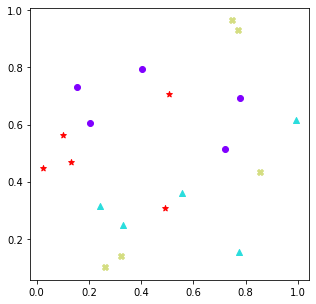

In [4]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Randomly generate coordinates
x_coords = np.random.random(20)
y_coords = np.random.random(20)

# Pick marker styles
markers = ['o', '^', 'X', '*']

# Generate 4 colors
colors = cm.rainbow(np.linspace(0, 1, 4))

#Plot the dataset using different colors and markers each time 
plt.figure(figsize=(5, 5))
plt.scatter(x_coords[0:5], y_coords[0:5], marker=markers[0], color=colors[0])
plt.scatter(x_coords[5:10], y_coords[5:10], marker=markers[1], color=colors[1])
plt.scatter(x_coords[10:15], y_coords[10:15], marker=markers[2], color=colors[2])
plt.scatter(x_coords[15:20], y_coords[15:20], marker=markers[3], color=colors[3])
plt.show()

For K-Means use the K-Means implementation of scikit, more information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).

For hierarchical clustering use the implementation of scikit, more information can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). 

To create a dendrogram use the implementation of scipy, more information can be found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

To get the within-cluster sum of squares for K-Means you can use `.inertia_`, to get the labels assigned to each item after clustering you can use `.labels_`.

***

Acknowledgment: This assignment was developed by Alfredo Núñez with the support of Kevin Chong, Siwarak Unsiwilai, Jurjen Hendriks, and Hongrui Wang. Suggestions and comments please to the email A.A.NunezVicencio@tudelft.nl

[1] A. Núñez, A. Jamshidi, and H. Wang, “Pareto-based maintenance decisions for regional railways with uncertain weld conditions using the Hilbert spectrum of axle box acceleration”. IEEE Transactions on Industrial Informatics, Volume 15, Issue 3, March 2019, Pages: 1496-1507. DOI: 10.1109/TII.2018.2847736

[2] Z. Li, M. Molodova, A. Núñez, and R. Dollevoet, “Improvements in axle box acceleration measurements for the detection of light squats in railway infrastructure”. IEEE Transactions on Industrial Electronics. Volume 62, Issue 7, July 2015, Pages: 4385-4397. DOI:10.1109/TIE.2015.2389761
